# XGBoost Model
##### Authors: Diego Senso González, Luis Vaciero
##### 11 december 2020
##### Module: Machine Learning - Master's Degree Data Science for Finance

## Libraries

We load the different libraries. Some of them will be used for the study in this document.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats as sts
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from math import sqrt
import itertools
import math
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.datasets import make_classification
import random
random.seed(1234)
from sklearn.impute import KNNImputer
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
import scikitplot as skplt

We load the data once we have cleaned it in previous steps.

In [15]:
#Loading data
loan = pd.read_csv("../notebooks/loan_lasso.csv", delimiter = ',')
loan

,Unnamed: 0,num_rev_tl_bal_gt_0,D,sec_app_chargeoff_within_12_mths,dti,F,sec_app_inq_last_6mths,mort_acc,B,tax_liens,...,open_acc,sec_app_mort_acc,sec_app_open_act_il,G,A,policy_code,num_rev_accts,E,num_bc_sats,loan_status
0,8,9.0,0,0.0,16.99,0,0.0,2.0,0,0.0,...,20.0,0.0,0.0,0,1,1.0,32.0,0,9.0,1.0
1,10,2.0,0,0.0,6.07,0,0.0,0.0,0,0.0,...,4.0,0.0,0.0,0,0,1.0,3.0,1,3.0,1.0
2,24,11.0,0,0.0,13.12,0,0.0,4.0,0,0.0,...,19.0,0.0,0.0,0,1,1.0,15.0,0,12.0,1.0
3,42,7.0,0,0.0,10.11,0,0.0,0.0,0,0.0,...,15.0,0.0,0.0,0,0,1.0,17.0,0,7.0,1.0
4,91,1.0,0,0.0,10.86,0,0.0,1.0,0,0.0,...,4.0,0.0,0.0,0,0,1.0,6.0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462220,421088,7.0,1,0.0,27.08,0,0.0,0.0,0,0.0,...,9.0,0.0,0.0,0,0,1.0,13.0,0,7.0,1.0
462221,421089,8.0,0,0.0,23.69,0,0.0,1.0,1,0.0,...,13.0,0.0,0.0,0,0,1.0,20.0,0,4.0,0.0
462222,421092,6.0,1,0.0,30.90,0,0.0,0.0,0,0.0,...,9.0,0.0,0.0,0,0,1.0,10.0,0,4.0,0.0
462223,421093,7.0,0,0.0,27.19,0,0.0,0.0,0,0.0,...,17.0,0.0,0.0,0,0,1.0,16.0,1,7.0,0.0


In [16]:
#We delete first column which does not useful values
loan = loan.drop(loan.columns[[0]], axis='columns')
loan

,num_rev_tl_bal_gt_0,D,sec_app_chargeoff_within_12_mths,dti,F,sec_app_inq_last_6mths,mort_acc,B,tax_liens,pub_rec_bankruptcies,...,open_acc,sec_app_mort_acc,sec_app_open_act_il,G,A,policy_code,num_rev_accts,E,num_bc_sats,loan_status
0,9.0,0,0.0,16.99,0,0.0,2.0,0,0.0,1.0,...,20.0,0.0,0.0,0,1,1.0,32.0,0,9.0,1.0
1,2.0,0,0.0,6.07,0,0.0,0.0,0,0.0,0.0,...,4.0,0.0,0.0,0,0,1.0,3.0,1,3.0,1.0
2,11.0,0,0.0,13.12,0,0.0,4.0,0,0.0,0.0,...,19.0,0.0,0.0,0,1,1.0,15.0,0,12.0,1.0
3,7.0,0,0.0,10.11,0,0.0,0.0,0,0.0,2.0,...,15.0,0.0,0.0,0,0,1.0,17.0,0,7.0,1.0
4,1.0,0,0.0,10.86,0,0.0,1.0,0,0.0,0.0,...,4.0,0.0,0.0,0,0,1.0,6.0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462220,7.0,1,0.0,27.08,0,0.0,0.0,0,0.0,0.0,...,9.0,0.0,0.0,0,0,1.0,13.0,0,7.0,1.0
462221,8.0,0,0.0,23.69,0,0.0,1.0,1,0.0,0.0,...,13.0,0.0,0.0,0,0,1.0,20.0,0,4.0,0.0
462222,6.0,1,0.0,30.90,0,0.0,0.0,0,0.0,1.0,...,9.0,0.0,0.0,0,0,1.0,10.0,0,4.0,0.0
462223,7.0,0,0.0,27.19,0,0.0,0.0,0,0.0,0.0,...,17.0,0.0,0.0,0,0,1.0,16.0,1,7.0,0.0


# XGBoost

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.

## Model

Now we separate the variable to predict from the variables which will be used to explain it.

In [17]:
# endogena

endogena = ['loan_status'] 

# exogenas

exogenas = list(set(list(loan.columns))-set(endogena))

X = loan[exogenas].values
Y = loan[endogena].values

In [18]:
exogenas

['open_acc',
 'num_rev_accts',
 'dti',
 'policy_code',
 'sec_app_open_acc',
 'A',
 'sec_app_num_rev_accts',
 'sec_app_collections_12_mths_ex_med',
 'B',
 'sec_app_inq_last_6mths',
 'D',
 'sec_app_open_act_il',
 'G',
 'tax_liens',
 'num_rev_tl_bal_gt_0',
 'sec_app_mort_acc',
 'num_actv_rev_tl',
 'F',
 'num_bc_sats',
 'pub_rec_bankruptcies',
 'sec_app_chargeoff_within_12_mths',
 'E',
 'mort_acc']

We create training set and test set using SMOTE

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=40)
sm = SMOTE(random_state=40, sampling_strategy = 0.4)
X_train, Y_train = sm.fit_sample(X_train, Y_train)
print(X_train.shape); print(X_test.shape)

(387126, 23)
(92445, 23)


Now we see the proportion of values 0 and 1 inside the training test and test set. This will be useful because we will be able to see if dataset is unbalanced, and if there is a huge difference between test and train set.

In [20]:
y_train = pd.DataFrame(Y_train, columns = ['loan_status'])
y_test = pd.DataFrame(Y_test, columns = ['loan_status'])

In [21]:
y_train['loan_status'].value_counts(normalize=True)

1.0    0.714287
0.0    0.285713
Name: loan_status, dtype: float64

In [22]:
y_test['loan_status'].value_counts(normalize=True)

1.0    0.745881
0.0    0.254119
Name: loan_status, dtype: float64

### Fitting

Now we fit the XGBoost model, make predictions and check the accuracy of our model.

In [23]:
# Fit model XGBoost
model = XGBClassifier()
model.fit(X_train, y_train)

C:\Users\diego\anaconda3\envs\gradiente\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Make predictions

In [24]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [25]:
# Evaluate predictions and get accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.01%


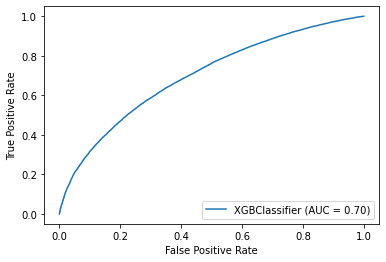

Logistic Regression score train:  0.7674090606159235
Logistic Regression score:  0.7501216939802045


In [26]:
metrics.plot_roc_curve(model, X_test, Y_test)
plt.show()                    
print("Logistic Regression score train: ", model.score(X_train, Y_train))
print("Logistic Regression score: ", model.score(X_test, Y_test))

We see that have obtainen 75.07% of accuracy in this model. It is not a bad result, but we will have to see if this is good predicting new datasets which we do not have yet. Using "pickle" we can save the model to do this later.

In [27]:
Y_pred_model = model.predict(X_test)
print(confusion_matrix(Y_test,Y_pred_model))
print(classification_report(Y_test,Y_pred_model))

[[ 2820 20672]
 [ 2428 66525]]
              precision    recall  f1-score   support

         0.0       0.54      0.12      0.20     23492
         1.0       0.76      0.96      0.85     68953

    accuracy                           0.75     92445
   macro avg       0.65      0.54      0.52     92445
weighted avg       0.71      0.75      0.69     92445



As you can see, the model manages to get 76% of customers who will pay and 54% of those who will not. The quality of the model can also be checked by observing the standardized confusion matrix:

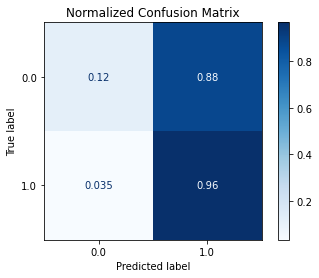

In [28]:
disp = plot_confusion_matrix(model, X_test, y_test,
                            cmap=plt.cm.Blues, normalize = 'true') #Confusion Matrix
plt.title('Normalized Confusion Matrix'); #Plot title

The normalized confusion matrix indicates that the model expects a high percentage of clients to pay, when in fact they will not. This is an error that is in line with what has been observed in previous models. 

### Cumulative Gains Curve

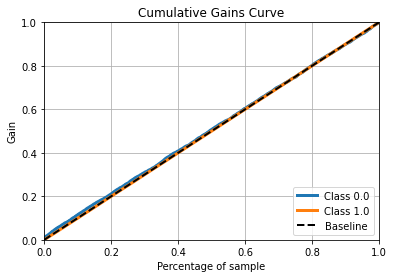

In [36]:
#Plot the cumulative gains graph
skplt.metrics.plot_cumulative_gain(Y_pred_model, X_test)
plt.show()

### Lift curve

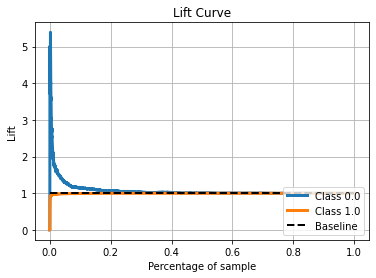

In [37]:
#Lift curve graph
skplt.metrics.plot_lift_curve(Y_pred_model, X_test);

Both the payments and the unpaid ones are obtained at the same rate as we increase the sample we work with (Cumulative Gains Curve). The lift curve indicates that with a little sample the model provides more than if you choose a random number of records, however it is a very small percentage.

### Shap Graphs

In [29]:
import shap
shap.initjs() #To visualize shap graphs

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# Calculate Shap values
shap_values = explainer.shap_values(X_test)

In [98]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test[0,:], feature_names=exogenas)

The graph indicates the most and least important variables for calculating the value of a particular observation. The value 1.41 is the prediction that the model has made for that observation.
The variable "B" (type of loan according to its interest rate) affects the calculation in a positive way. Also, the variable "num_rev_tl_bal_gt" (Number of revolving trades with balance >0) affects in a positive way. The main variable that affects in a negative way is "mort_acc" (Number of mortgage accounts).

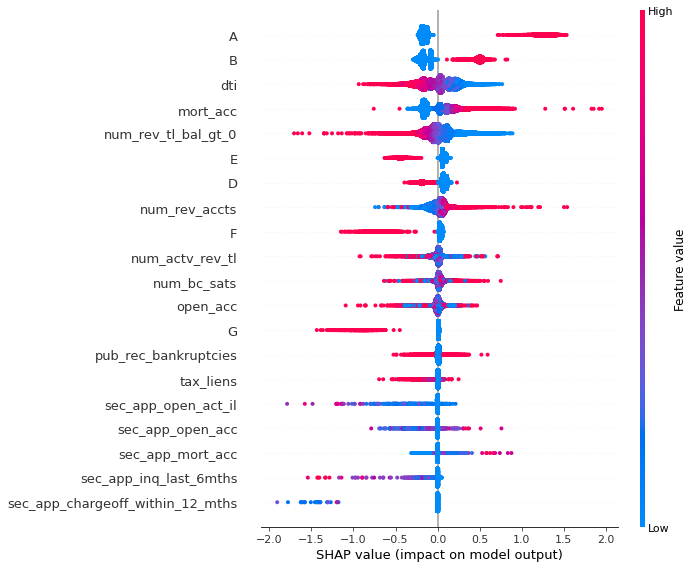

In [242]:
shap.summary_plot(shap_values, features=X_test, feature_names=exogenas, max_display=None, plot_type=None, color=None, axis_color='#333333', title=None, alpha=1, show=True, sort=True, color_bar=True, plot_size='auto', layered_violin_max_num_bins=20, class_names=None, class_inds=None, color_bar_label='Feature value')

In this other graph, we can study which are the most important variables to explain the payment or non-payment. The two variables with the greatest impact are "A" and "B". Both affect with a high impact on positive values, and they affect in negative values but with a low impact. Next is the variable "dti" (A ratio calculated using the borrower's total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower's self-reported monthly income). This variable affects the opposite, with a high impact on negative values and a low impact on positive values.

Finally, with the following interactive graph we can observe the importance of certain variables when we are in certain values of the prediction (for the first 100 observations). In addition, we can modify the axes to see the effect of a particular variable, or a pair of variables at the same time.

In [31]:
shap.force_plot(explainer.expected_value, shap_values[0:99,:], X_test[0:99,:], plot_cmap="DrDb", feature_names=exogenas,)

### Saving

In [32]:
#We import pickle to save the model and use it later with new data
import pickle
filename = 'xgboost.sav'
pickle.dump(model, open (filename, 'wb'))
model2 = pickle.load(open('xgboost.sav', 'rb'))
model2

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Loading and using for new data

We load the model we saved and use it to predict the new dataset which we give to the model.

In [33]:
#Load model and obtain accuracy for new dataset
model = pickle.load(open('xgboost.sav', 'rb'))
result = model.score(X_test, Y_test)
print("Accuracy: %.2f%%" % (result * 100.0))

Accuracy: 75.01%


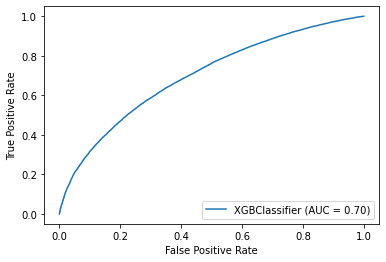

Logistic Regression score train:  0.7674090606159235
Logistic Regression score:  0.7501216939802045


In [34]:
metrics.plot_roc_curve(model, X_test, Y_test)
plt.show()                    
print("Logistic Regression score train: ", model.score(X_train, Y_train))
print("Logistic Regression score: ", model.score(X_test, Y_test))

In [35]:
Y_pred_model = model.predict(X_test)
print(confusion_matrix(Y_test,Y_pred_model))
print(classification_report(Y_test,Y_pred_model))

[[ 2820 20672]
 [ 2428 66525]]
              precision    recall  f1-score   support

         0.0       0.54      0.12      0.20     23492
         1.0       0.76      0.96      0.85     68953

    accuracy                           0.75     92445
   macro avg       0.65      0.54      0.52     92445
weighted avg       0.71      0.75      0.69     92445



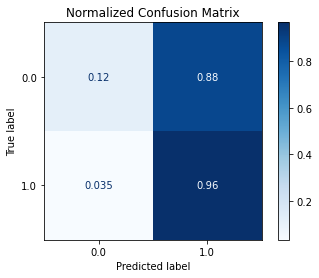

In [36]:
disp = plot_confusion_matrix(model, X_test, y_test,
                            cmap=plt.cm.Blues, normalize = 'true') #Confusion Matrix
plt.title('Normalized Confusion Matrix'); #Plot title